In [64]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 메모리
import gc

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 13
plt.rcParams['axes.unicode_minus'] = False

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 카이제곱 독립성 검정
from scipy.stats import chi2_contingency

In [2]:
# 데이터프레임을 넣고 column별 특성 및 결측값, 고유값들을 확인하는 함수 사용

def resumetable(df, n):
    print(f'데이터셋 크기: {df.shape}')                                # 데이터프레임의 전체 크기(행, 열) 출력

    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])         # 각 피처의 데이터 타입을 가져와 데이터프레임으로 생성
    summary = summary.reset_index()                                    # 인덱스를 초기화하여 컬럼으로 변환
    summary = summary.rename(columns={'index':'피처'})                 # 'index' 컬럼명을 '피처'로 변경

    summary['결측값 개수'] = df.isnull().sum().values                 # 각 피처의 결측값(null) 개수 계산
    summary['고유값 개수'] = df.nunique().values                      # 각 피처의 고유값 개수 계산
    
    for i in range(n):
        summary[f"{i+1}번째 값"] = df.iloc[i].values
    
    return summary                                                     # 요약 테이블 반환

In [4]:
# 불필요한 컬럼 drop 후 메인 데이터 읽어오기
df = pd.read_csv('data/결측치처리_변환추가.csv')

In [15]:
df_raw = pd.read_csv('data/kyrbs2024_수정.csv')

In [6]:
pd.set_option('display.max_rows', None)

In [7]:
resumetable(df,3)

데이터셋 크기: (54653, 79)


,피처,데이터 타입,결측값 개수,고유값 개수,1번째 값,2번째 값,3번째 값
0,OBS,object,0,54653,A100001,A100002,A100003
1,조사연도,float64,0,1,2024.0,2024.0,2024.0
2,시도,object,0,17,서울,서울,서울
3,도시규모,object,0,3,대도시,대도시,대도시
4,학교구분,object,0,2,중학교,중학교,중학교
5,학교유형,object,0,3,남녀공학,남녀공학,남녀공학
6,지역군,object,0,49,서울대4-3,서울대4-3,서울대4-3
7,주관적_건강_인지,float64,0,5,1.0,1.0,1.0
8,주관적_체형_인지,float64,0,5,2.0,4.0,3.0
9,평생_흡연_경험,float64,0,2,1.0,1.0,1.0


---

# H6 : 전자담배 사용자는 흡연 광고 노출 경험이 많다.

In [21]:
# 담배광고_없음이 5.0이면 '광고 안 봄', 아니면 '광고 봄'으로 표시
df['광고_노출여부'] = df['담배광고_없음'].apply(lambda x: '광고 노출 경험 없음' if x == 5.0 else '광고 노출 경험 있음')

## 전자담배 경험 : 액상형 전자담배 / 비경험자 : 나머지

In [22]:
df['변환_전자담배_경험'].value_counts()

변환_전자담배_경험
False    51028
True      3625
Name: count, dtype: int64

In [23]:
# 전자담배 경험자와 비경험자 나누기
users = df[df['변환_전자담배_경험'] == 1]
non_users = df[df['변환_전자담배_경험'] == 0]

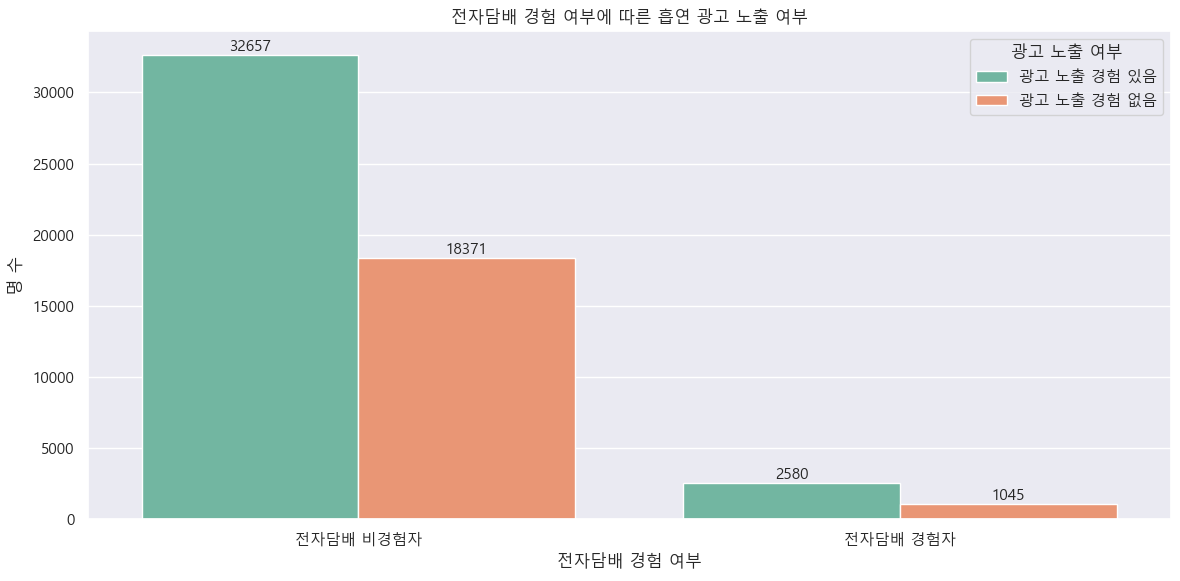

In [43]:
ax = sns.countplot(
    data=df,
    x='변환_전자담배_경험',
    hue='광고_노출여부',
    palette='Set2'
)

plt.xticks([0, 1], ['전자담배 비경험자', '전자담배 경험자'])
plt.xlabel('전자담배 경험 여부')
plt.ylabel('명 수')
plt.title('전자담배 경험 여부에 따른 흡연 광고 노출 여부')
plt.legend(title='광고 노출 여부', loc='upper right')

# 라벨링 추가
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',  # 정수로 변환
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

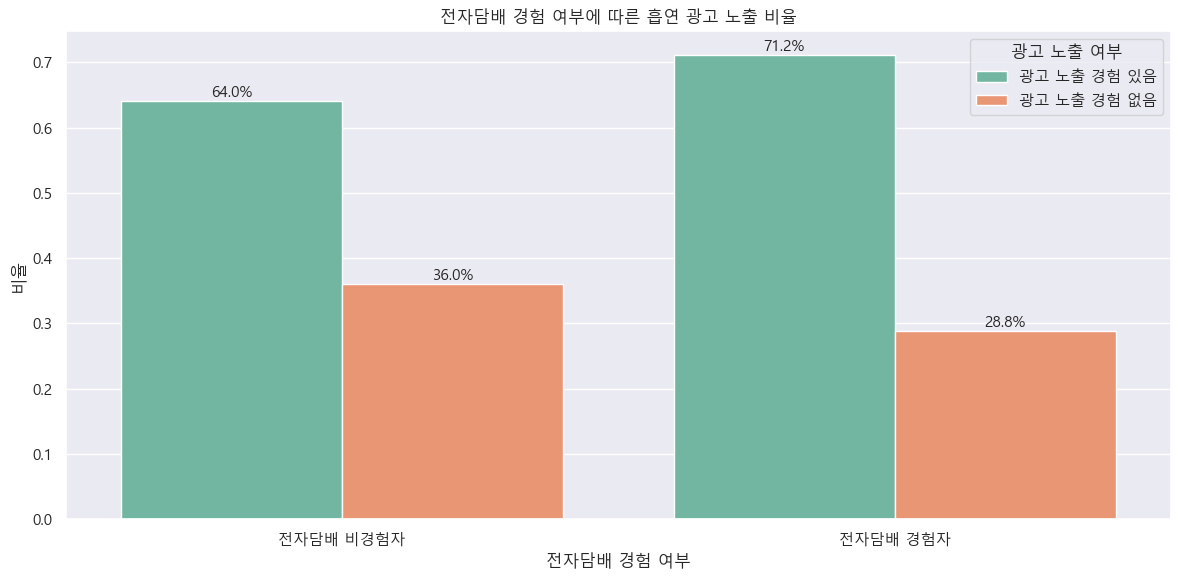

In [46]:
ax = sns.barplot(
    data=ratio_melted,
    x='변환_전자담배_경험',
    y='비율',
    hue='광고_노출여부',
    palette='Set2',
    hue_order=['광고 노출 경험 있음', '광고 노출 경험 없음']
)

ax.set_xticklabels(['전자담배 비경험자', '전자담배 경험자'])

# 백분율 라벨 추가
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0.01:
            ax.annotate(f'{height*100:.1f}%',
                        (bar.get_x() + bar.get_width()/2, height),
                        ha='center', va='bottom', fontsize=11)

plt.xlabel('전자담배 경험 여부')
plt.ylabel('비율')
plt.title('전자담배 경험 여부에 따른 흡연 광고 노출 비율')
plt.legend(title='광고 노출 여부')
plt.tight_layout()
plt.show()

In [66]:
# 1. 교차표 생성
contingency = pd.crosstab(
    df['변환_전자담배_경험'],  # 0: 비경험자, 1: 경험자
    df['광고_노출여부']         # '광고 노출 경험 있음', '광고 노출 경험 없음'
)

# 2. 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-squared: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequency Table:")
print(pd.DataFrame(expected, index=contingency.index, columns=contingency.columns))

Chi-squared: 75.7409
p-value: 0.0000
Degrees of Freedom: 1

Expected Frequency Table:
광고_노출여부      광고 노출 경험 없음   광고 노출 경험 있음
변환_전자담배_경험                            
False       18128.184144  32899.815856
True         1287.815856   2337.184144


- 전자담배(액상형) 사용자가 비사용자보다 흡연 광고 노출 경험이 많다 : True

---

## 전자담배 경험자 : 전자담배_경험 + 궐련형 전자담배_경험 / 비경험자 : 나머지

In [47]:
df['전자담배_통합경험'] = (df['변환_전자담배_경험'] == True) | (df['변환_궐련형_전자담배_경험'] == True)

In [48]:
df['전자담배_통합경험'].value_counts()

전자담배_통합경험
False    50790
True      3863
Name: count, dtype: int64

In [51]:
df['변환_전자담배_경험'].value_counts()

변환_전자담배_경험
False    51028
True      3625
Name: count, dtype: int64

In [49]:
df['변환_궐련형_전자담배_경험'].value_counts()

변환_궐련형_전자담배_경험
False    52638
True      2015
Name: count, dtype: int64

In [50]:
count = ((df['변환_전자담배_경험'] == True) & (df['변환_궐련형_전자담배_경험'] == True)).sum()
print(f"두 항목 모두 경험한 사람 수: {count}")

두 항목 모두 경험한 사람 수: 1777


In [53]:
# 전자담배_통합경험: True/False → 문자열 라벨로 바꾸기
df['전자담배_통합경험_라벨'] = df['전자담배_통합경험'].map({
    True: '전자담배 경험자',
    False: '전자담배 비경험자'
})

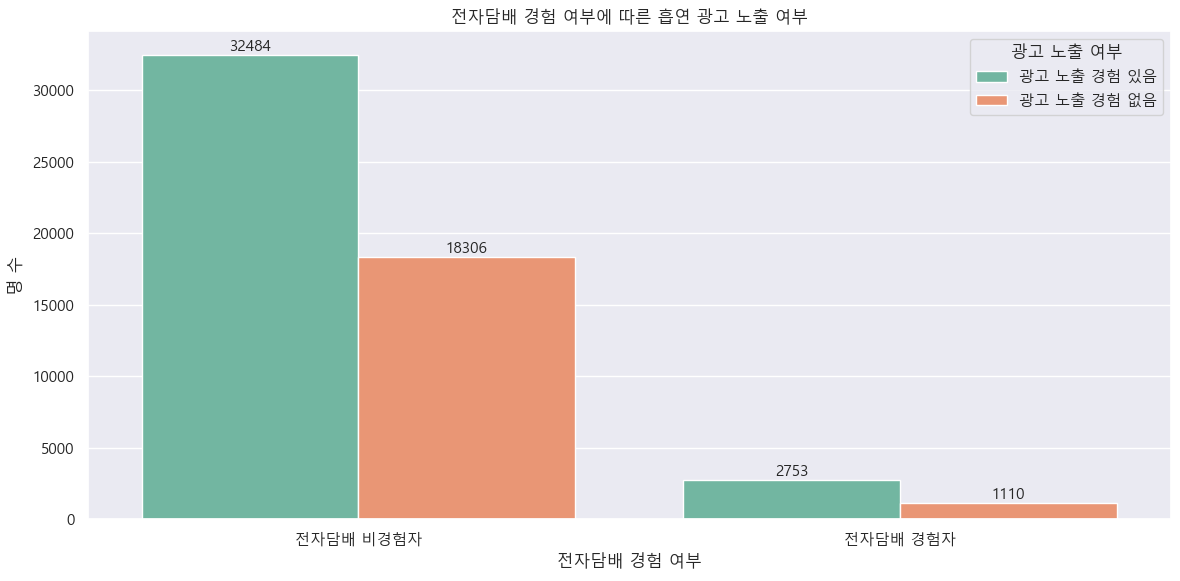

In [54]:
ax = sns.countplot(
    data=df,
    x='전자담배_통합경험_라벨',
    hue='광고_노출여부',
    palette='Set2',
    hue_order=['광고 노출 경험 있음', '광고 노출 경험 없음']
)

plt.xlabel('전자담배 경험 여부')
plt.ylabel('명 수')
plt.title('전자담배 경험 여부에 따른 흡연 광고 노출 여부')
plt.legend(title='광고 노출 여부', loc='upper right')

# 막대 위 라벨링
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width()/2, height),
                    ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

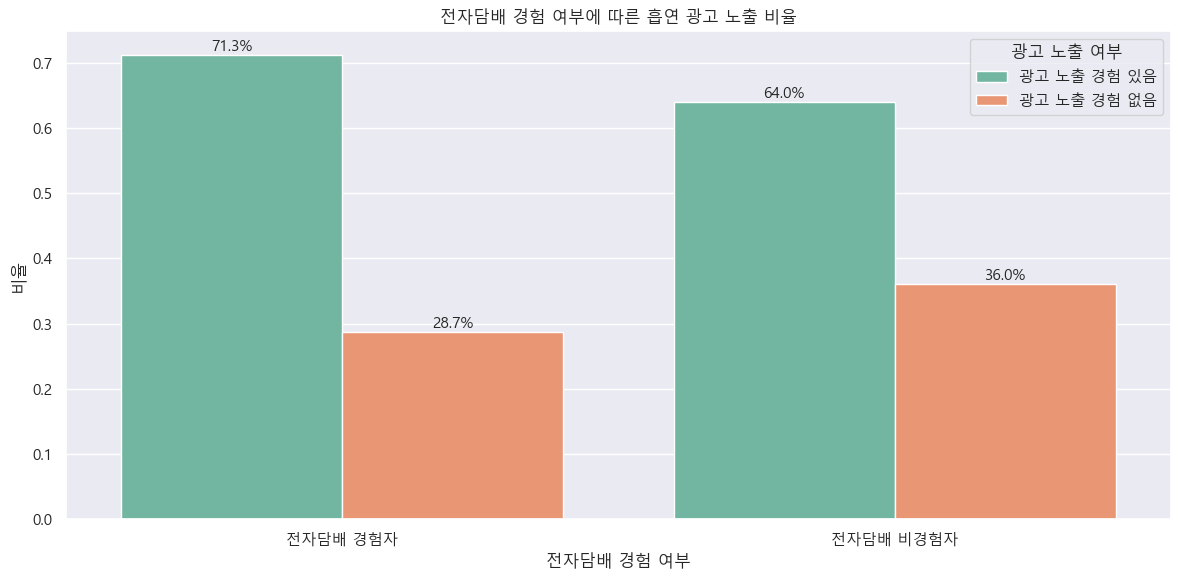

In [60]:
# 비율 계산용 교차표 → long-form 변환
ratio_df = pd.crosstab(
    df['전자담배_통합경험_라벨'],
    df['광고_노출여부'],
    normalize='index'
).reset_index()

ratio_melted = pd.melt(
    ratio_df,
    id_vars='전자담배_통합경험_라벨',
    var_name='광고_노출여부',
    value_name='비율'
)

# 비율 시각화
ax = sns.barplot(
    data=ratio_melted,
    x='전자담배_통합경험_라벨',
    y='비율',
    hue='광고_노출여부',
    palette='Set2',
    hue_order=['광고 노출 경험 있음', '광고 노출 경험 없음']
)

# 비율 라벨링 추가
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0.01:
            ax.annotate(f'{height*100:.1f}%',
                        (bar.get_x() + bar.get_width()/2, height),
                        ha='center', va='bottom', fontsize=11)

plt.xlabel('전자담배 경험 여부')
plt.ylabel('비율')
plt.title('전자담배 경험 여부에 따른 흡연 광고 노출 비율')
plt.legend(title='광고 노출 여부', loc='upper right')
plt.tight_layout()
plt.show()

In [61]:
contingency = pd.crosstab(
    df['전자담배_통합경험_라벨'],
    df['광고_노출여부']
)

In [62]:
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-squared: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequency Table:")
print(pd.DataFrame(expected, index=contingency.index, columns=contingency.columns))

Chi-squared: 83.3958
p-value: 0.0000
Degrees of Freedom: 1

Expected Frequency Table:
광고_노출여부        광고 노출 경험 없음   광고 노출 경험 있음
전자담배_통합경험_라벨                            
전자담배 경험자       1372.367628   2490.632372
전자담배 비경험자     18043.632372  32746.367628


- 전자담배 사용자(액상+궐련 통합)가 비사용자보다 광고 노출 경험이 많다.

---

## 전자담배 / 일반담배 / 미사용자

In [69]:
vape_users = df[df['전자담배_통합경험'] == True]
cig_users = df[df['평생_흡연_경험'] == 2.0]
vapecig_non_users = df[(df['전자담배_통합경험'] == False) & (df['평생_흡연_경험'] == 1.0)]

In [71]:
# 복사 후 그룹 이름 부여
vape_users_ = vape_users.copy()
vape_users_['사용자유형'] = '전자담배 사용자'

cig_users_ = cig_users.copy()
cig_users_['사용자유형'] = '일반담배 사용자'

non_users_ = non_users.copy()
non_users_['사용자유형'] = '미사용자'

# 하나로 합치기
df_users_all = pd.concat([vape_users_, cig_users_, non_users_])

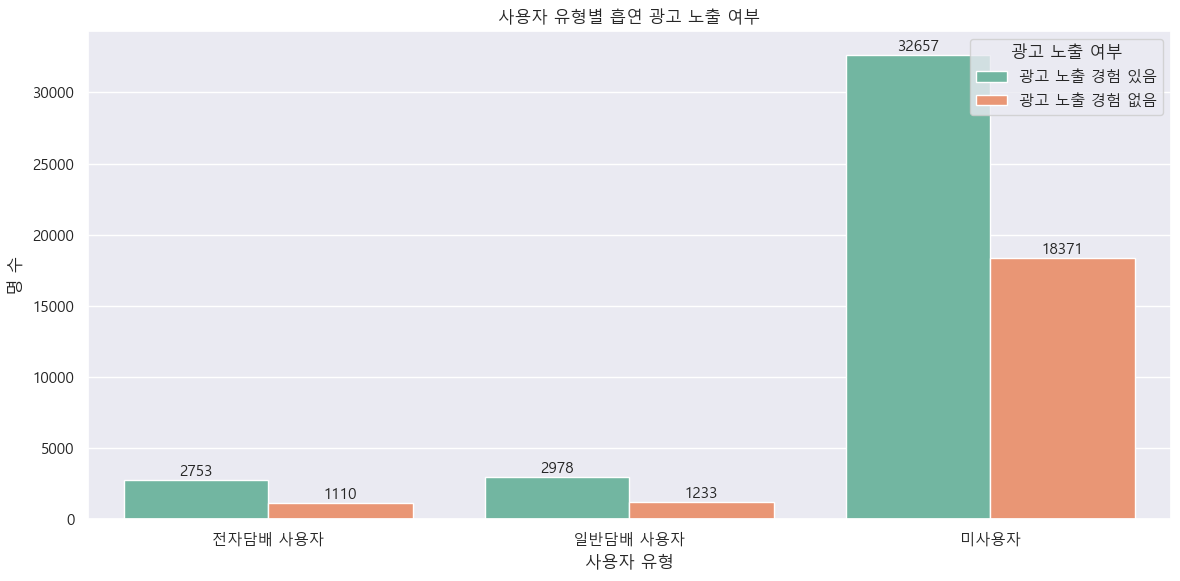

In [72]:
ax = sns.countplot(
    data=df_users_all,
    x='사용자유형',
    hue='광고_노출여부',
    palette='Set2',
    hue_order=['광고 노출 경험 있음', '광고 노출 경험 없음']
)

plt.xlabel('사용자 유형')
plt.ylabel('명 수')
plt.title('사용자 유형별 흡연 광고 노출 여부')
plt.legend(title='광고 노출 여부', loc='upper right')

# 라벨링 추가
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

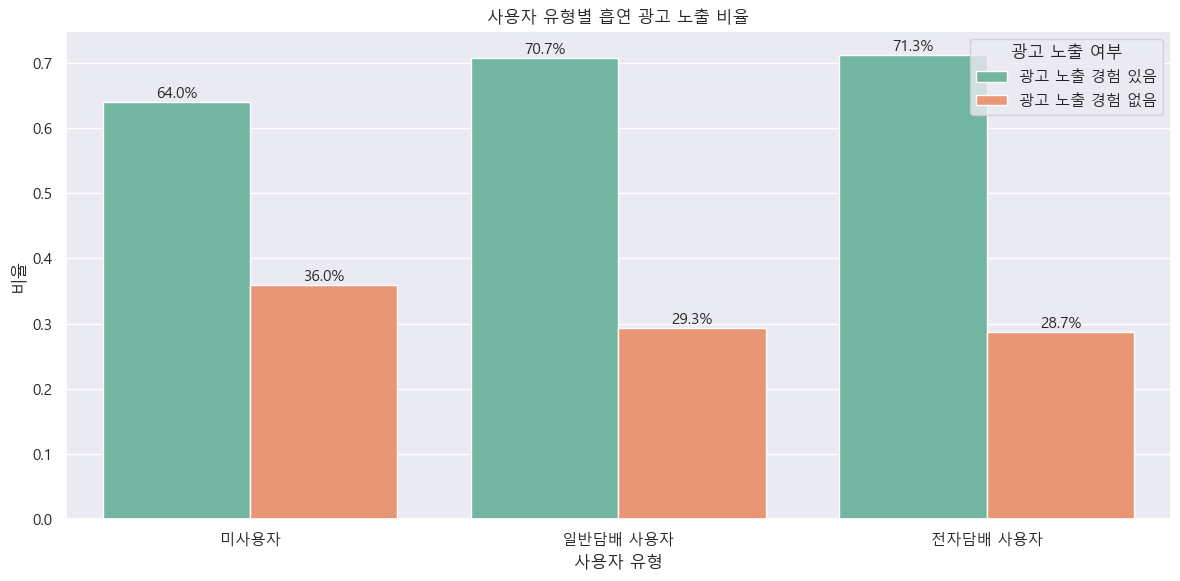

In [73]:
# 1. 사용자 유형 통합된 DataFrame 사용
# df_users_all: vape_users_, cig_users_, non_users_ 를 concat한 결과

# 2. 교차표 (비율 계산)
ratio_df = pd.crosstab(
    df_users_all['사용자유형'],
    df_users_all['광고_노출여부'],
    normalize='index'
).reset_index()

# 3. long-form 변환
ratio_melted = pd.melt(
    ratio_df,
    id_vars='사용자유형',
    var_name='광고_노출여부',
    value_name='비율'
)

# 4. 비율 그래프 그리기
ax = sns.barplot(
    data=ratio_melted,
    x='사용자유형',
    y='비율',
    hue='광고_노출여부',
    palette='Set2',
    hue_order=['광고 노출 경험 있음', '광고 노출 경험 없음']
)

plt.xlabel('사용자 유형')
plt.ylabel('비율')
plt.title('사용자 유형별 흡연 광고 노출 비율')
plt.legend(title='광고 노출 여부', loc='upper right')

# 5. 백분율 라벨링
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0.01:
            ax.annotate(f'{height*100:.1f}%',
                        (bar.get_x() + bar.get_width()/2, height),
                        ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

In [117]:
from scipy.stats import chi2_contingency
from itertools import combinations
import pandas as pd

# 사용자 그룹 이름 리스트
group_names = ['전자담배 사용자', '일반담배 사용자', '미사용자']

# 결과 저장 리스트
results = []

# 모든 2쌍 조합에 대해 반복
for g1, g2 in combinations(group_names, 2):
    # 해당 두 그룹만 필터링
    subset = df_users_all[df_users_all['사용자유형'].isin([g1, g2])]
    
    # 교차표 생성
    contingency = pd.crosstab(subset['사용자유형'], subset['광고_노출여부'])

    # 교차표가 2x2일 경우에만 카이제곱 검정 진행
    if contingency.shape == (2, 2):
        chi2, p, dof, expected = chi2_contingency(contingency)
        results.append({
            '비교': f"{g1} vs {g2}",
            'Chi2': round(chi2, 4),
            'p-value': round(p, 4),
            '자유도': dof
        })
    else:
        results.append({
            '비교': f"{g1} vs {g2}",
            'Chi2': 'N/A',
            'p-value': '데이터 부족',
            '자유도': '-'
        })

# 결과 DataFrame으로 정리
pairwise_results_df = pd.DataFrame(results)

# 결과 출력
pairwise_results_df

,비교,Chi2,p-value,자유도
0,전자담배 사용자 vs 일반담배 사용자,0.2660,0.606,1
1,전자담배 사용자 vs 미사용자,82.5317,0.000,1
2,일반담배 사용자 vs 미사용자,76.4660,0.000,1


## 중복 사용자 / 전자담배 사용자(액상+궐련) / 일반담배 사용자 / 미사용자

In [81]:
# 조건별 마스크
mask_both = (df['전자담배_통합경험'] == True) & (df['평생_흡연_경험'] == 2.0)
mask_only_e = (df['전자담배_통합경험'] == True) & (df['평생_흡연_경험'] != 2.0)
mask_only_c = (df['전자담배_통합경험'] == False) & (df['평생_흡연_경험'] == 2.0)
mask_none   = (df['전자담배_통합경험'] == False) & (df['평생_흡연_경험'] != 2.0)

# 그룹 나누기
df_both      = df[mask_both]
df_only_e    = df[mask_only_e]
df_only_c    = df[mask_only_c]
df_none      = df[mask_none]

In [82]:
print("둘 다 사용자:", len(df_both))
print("전자담배만 사용자:", len(df_only_e))
print("일반담배만 사용자:", len(df_only_c))
print("미사용자:", len(df_none))

둘 다 사용자: 3032
전자담배만 사용자: 831
일반담배만 사용자: 1179
미사용자: 49611


In [83]:
# 라벨링
df_both['사용자유형'] = '둘 다 사용자'
df_only_e['사용자유형'] = '전자담배만 사용자'
df_only_c['사용자유형'] = '일반담배만 사용자'
df_none['사용자유형'] = '미사용자'

# 통합
df_grouped = pd.concat([df_both, df_only_e, df_only_c, df_none])

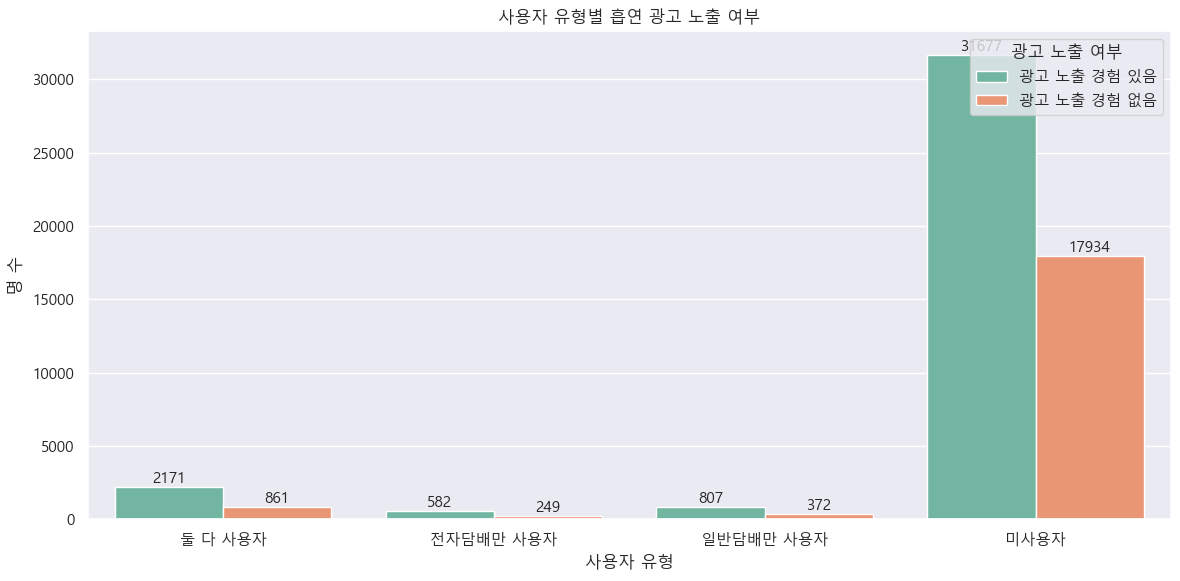

In [84]:
ax = sns.countplot(
    data=df_grouped,
    x='사용자유형',
    hue='광고_노출여부',
    palette='Set2',
    hue_order=['광고 노출 경험 있음', '광고 노출 경험 없음']
)

plt.xlabel('사용자 유형')
plt.ylabel('명 수')
plt.title('사용자 유형별 흡연 광고 노출 여부')
plt.legend(title='광고 노출 여부', loc='upper right')

# 라벨링
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width()/2, height),
                    ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

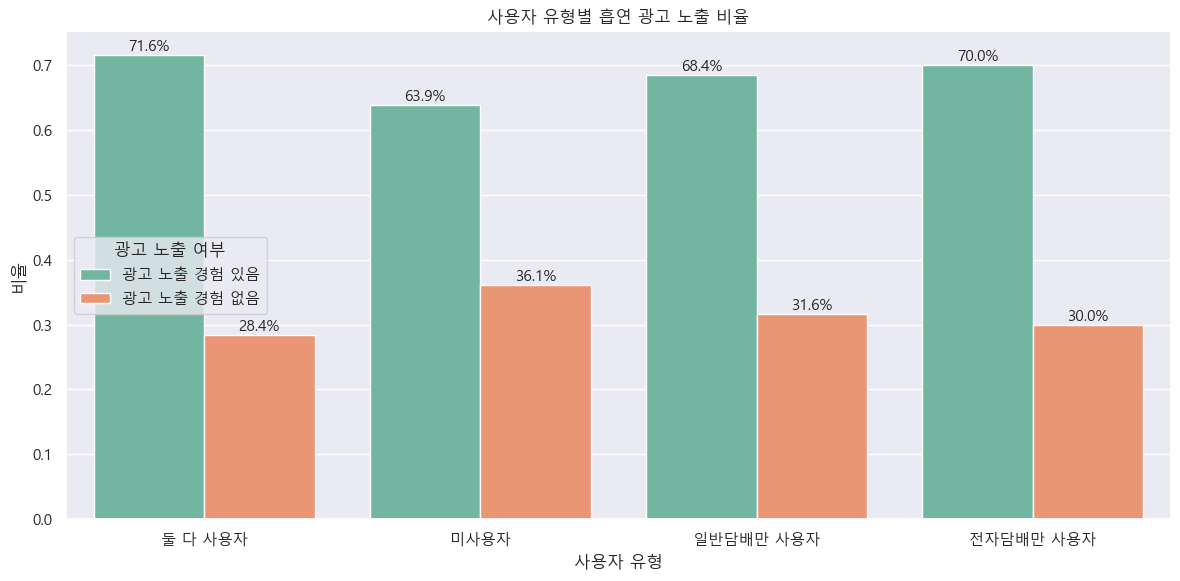

In [85]:
# 비율용 교차표
ratio_df = pd.crosstab(
    df_grouped['사용자유형'],
    df_grouped['광고_노출여부'],
    normalize='index'
).reset_index()

# long-form 변환
ratio_melted = pd.melt(
    ratio_df,
    id_vars='사용자유형',
    var_name='광고_노출여부',
    value_name='비율'
)

# 비율 그래프
ax = sns.barplot(
    data=ratio_melted,
    x='사용자유형',
    y='비율',
    hue='광고_노출여부',
    palette='Set2',
    hue_order=['광고 노출 경험 있음', '광고 노출 경험 없음']
)

plt.xlabel('사용자 유형')
plt.ylabel('비율')
plt.title('사용자 유형별 흡연 광고 노출 비율')
plt.legend(title='광고 노출 여부')

# 비율 라벨링
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0.01:
            ax.annotate(f'{height*100:.1f}%',
                        (bar.get_x() + bar.get_width()/2, height),
                        ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

In [86]:
from scipy.stats import chi2_contingency

# 교차표 생성
contingency = pd.crosstab(df_grouped['사용자유형'], df_grouped['광고_노출여부'])

# 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(contingency)

print("▶ 사용자유형 vs 광고 노출 여부 - 카이제곱 검정 결과")
print(f"Chi-squared 통계량: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"자유도: {dof}")
print("\n▶ 기대빈도:")
print(pd.DataFrame(expected, index=contingency.index, columns=contingency.columns))

▶ 사용자유형 vs 광고 노출 여부 - 카이제곱 검정 결과
Chi-squared 통계량: 95.0390
p-value: 0.0000
자유도: 3

▶ 기대빈도:
광고_노출여부     광고 노출 경험 없음   광고 노출 경험 있음
사용자유형                                
둘 다 사용자     1077.146945   1954.853055
미사용자       17624.781366  31986.218634
일반담배만 사용자    418.851005    760.148995
전자담배만 사용자    295.220683    535.779317


In [89]:
from scipy.stats import chi2_contingency
from itertools import combinations
import pandas as pd

# 모든 사용자 유형
unique_groups = ['둘 다 사용자', '전자담배만 사용자', '일반담배만 사용자', '미사용자']

# 결과 저장용
results = []

# 모든 2쌍 조합
for g1, g2 in combinations(unique_groups, 2):
    subset = df_grouped[df_grouped['사용자유형'].isin([g1, g2])]
    contingency = pd.crosstab(subset['사용자유형'], subset['광고_노출여부'])

    if contingency.shape == (2, 2):  # 교차표가 2x2일 때만 유효
        chi2, p, dof, expected = chi2_contingency(contingency)
        results.append({
            '비교': f"{g1} vs {g2}",
            'Chi2': round(chi2, 4),
            'p-value': round(p, 4),
            '자유도': dof
        })
    else:
        results.append({
            '비교': f"{g1} vs {g2}",
            'Chi2': 'N/A',
            'p-value': '데이터 부족',
            '자유도': '-'
        })

# 결과 정리
pairwise_results_df = pd.DataFrame(results)

In [91]:
pairwise_results_df

,비교,Chi2,p-value,자유도
0,둘 다 사용자 vs 전자담배만 사용자,0.7073,0.4004,1
1,둘 다 사용자 vs 일반담배만 사용자,3.9300,0.0474,1
2,둘 다 사용자 vs 미사용자,74.4652,0.0000,1
3,전자담배만 사용자 vs 일반담배만 사용자,0.5039,0.4778,1
4,전자담배만 사용자 vs 미사용자,13.2968,0.0003,1
5,일반담배만 사용자 vs 미사용자,10.3593,0.0013,1


- 전자담배 사용자 vs 둘다 사용자 / 전자담배 vs 일반담배 사용자는 차이가 없다...

# H8 : 전자담배 사용자는 흡연 장소와 구매 경로가 일반담배 사용자와 다르다.

In [94]:
resumetable(df,3)

데이터셋 크기: (54653, 82)


,피처,데이터 타입,결측값 개수,고유값 개수,1번째 값,2번째 값,3번째 값
0,OBS,object,0,54653,A100001,A100002,A100003
1,조사연도,float64,0,1,2024.0,2024.0,2024.0
2,시도,object,0,17,서울,서울,서울
3,도시규모,object,0,3,대도시,대도시,대도시
4,학교구분,object,0,2,중학교,중학교,중학교
5,학교유형,object,0,3,남녀공학,남녀공학,남녀공학
6,지역군,object,0,49,서울대4-3,서울대4-3,서울대4-3
7,주관적_건강_인지,float64,0,5,1.0,1.0,1.0
8,주관적_체형_인지,float64,0,5,2.0,4.0,3.0
9,평생_흡연_경험,float64,0,2,1.0,1.0,1.0


In [104]:
# 전자담배 사용자 / 일반담배 사용자 마스크
mask_e = df["전자담배_통합경험"] == True
mask_c = df["변환_평생_흡연_경험"] == True

## 흡연장소

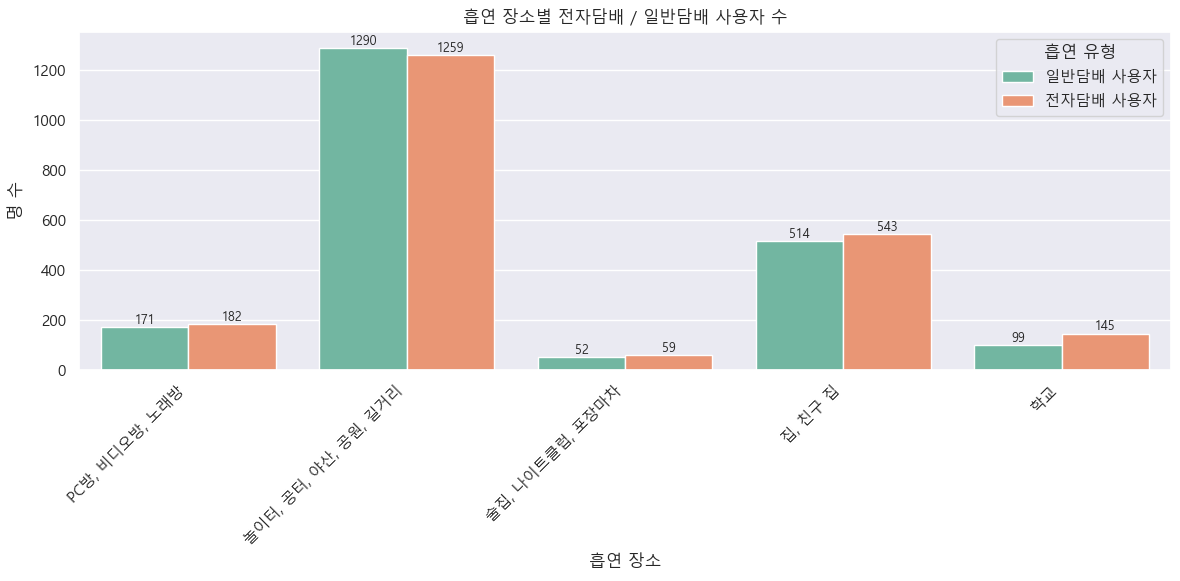

In [122]:
# 필요한 열만 추출
subset = df[["변환_흡연장소", "전자담배_통합경험", "변환_평생_흡연_경험"]].copy()

# long-form 변환
melted = pd.melt(
    subset,
    id_vars="변환_흡연장소",
    value_vars=["전자담배_통합경험", "변환_평생_흡연_경험"],
    var_name="흡연유형",
    value_name="사용여부"
)

# 사용자만 필터링
melted = melted[melted["사용여부"] == True]

# 그룹별 count
plot_data = (
    melted
    .groupby(["흡연유형", "변환_흡연장소"])
    .size()
    .reset_index(name="count")
)

# 이름 정리
plot_data["흡연유형"] = plot_data["흡연유형"].map({
    "전자담배_통합경험": "전자담배 사용자",
    "변환_평생_흡연_경험": "일반담배 사용자"
})

# 시각화
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=plot_data,
    x="변환_흡연장소",
    y="count",
    hue="흡연유형",
    palette="Set2"
)

# 라벨 추가 (명 수)
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.5,
            f"{int(height)}",
            ha="center",
            va="bottom",
            fontsize=9
        )

plt.title("흡연 장소별 전자담배 / 일반담배 사용자 수")
plt.ylabel("명 수")
plt.xlabel("흡연 장소")
plt.xticks(rotation=45, ha="right")
plt.legend(title="흡연 유형")
plt.tight_layout()
plt.show()


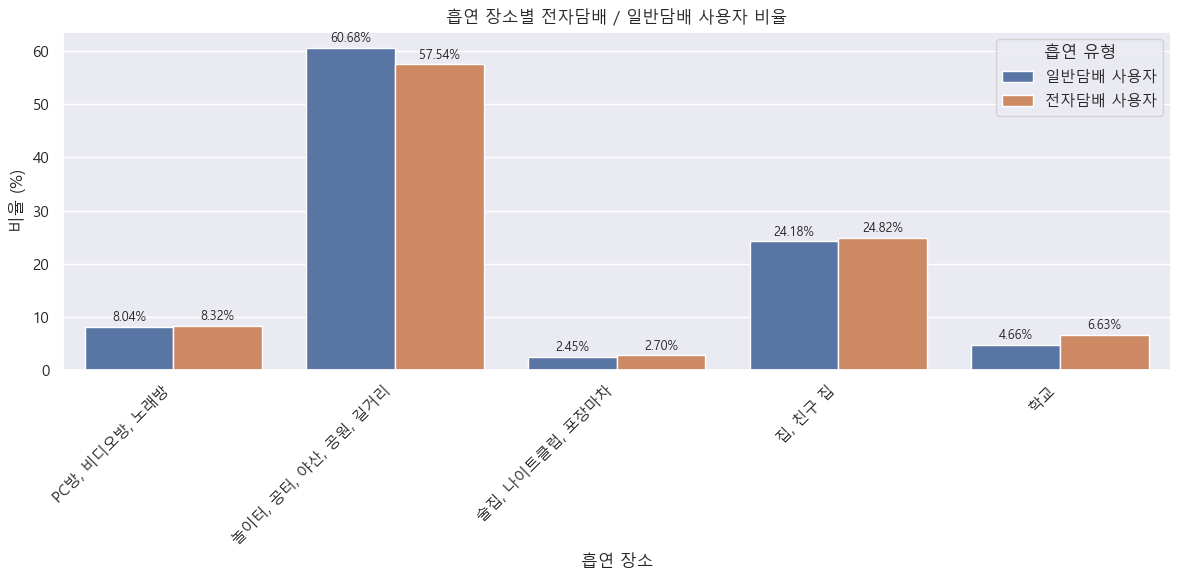

In [123]:
# 필요한 열만 추출
subset = df[["변환_흡연장소", "전자담배_통합경험", "변환_평생_흡연_경험"]].copy()

# long-form 변환
melted = pd.melt(
    subset,
    id_vars="변환_흡연장소",
    value_vars=["전자담배_통합경험", "변환_평생_흡연_경험"],
    var_name="흡연유형",
    value_name="사용여부"
)

# 사용자만 필터링
melted = melted[melted["사용여부"] == True]

# 그룹별 count
plot_data = (
    melted
    .groupby(["흡연유형", "변환_흡연장소"])
    .size()
    .reset_index(name="count")
)

# 비율 계산
plot_data["percent"] = (
    plot_data
    .groupby("흡연유형")["count"]
    .transform(lambda x: x / x.sum() * 100)
)

# 이름 정리
plot_data["흡연유형"] = plot_data["흡연유형"].map({
    "전자담배_통합경험": "전자담배 사용자",
    "변환_평생_흡연_경험": "일반담배 사용자"
})

# 시각화
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=plot_data,
    x="변환_흡연장소",
    y="percent",
    hue="흡연유형"
)

# 라벨 추가
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.5,
            f"{height:.2f}%",
            ha="center",
            va="bottom",
            fontsize=9
        )

plt.title("흡연 장소별 전자담배 / 일반담배 사용자 비율")
plt.ylabel("비율 (%)")
plt.xlabel("흡연 장소")
plt.xticks(rotation=45, ha="right")
plt.legend(title="흡연 유형")
plt.tight_layout()
plt.show()

- 카이제곱검정은 기본적으로 독립성이 보장된 상태에서만 가능하므로,
- 전자담배만 사용자 / 일반담배만 사용자 / 중복 사용자로 나누어서 카이제곱 검정 진행

In [146]:
from scipy.stats import chi2_contingency
import pandas as pd

# 1. 사용자유형 분류 (같은 방식)
subset = df[["변환_흡연장소", "전자담배_통합경험", "변환_평생_흡연_경험"]].copy()

def classify_user(row):
    e = row["전자담배_통합경험"]
    c = row["변환_평생_흡연_경험"]
    if e and not c:
        return "전자담배만 사용자"
    elif not e and c:
        return "일반담배만 사용자"
    elif e and c:
        return "중복 사용자"
    else:
        return None

subset["사용자유형"] = subset.apply(classify_user, axis=1)
subset = subset[subset["사용자유형"].notna() & subset["변환_흡연장소"].notna()]

# 2. 쌍별 비교 그룹 목록
pairs = [
    ("전자담배만 사용자", "일반담배만 사용자"),
    ("전자담배만 사용자", "중복 사용자"),
    ("일반담배만 사용자", "중복 사용자")
]

# 3. 쌍별 카이제곱 검정
print("✅ [H8-2] 쌍별 흡연 장소 분포 비교 결과")
for g1, g2 in pairs:
    temp = subset[subset["사용자유형"].isin([g1, g2])]
    ct = pd.crosstab(temp["변환_흡연장소"], temp["사용자유형"])
    chi2, p, dof, expected = chi2_contingency(ct)
    print(f"\n▶️ {g1} vs {g2}")
    print(f"Chi2 통계량: {chi2:.3f}")
    print(f"p-value: {p:.5f}")
    print("→", "차이 있음 (기각)" if p < 0.05 else "차이 없음 (기각할 수 없음)")

✅ [H8-2] 쌍별 흡연 장소 분포 비교 결과

▶️ 전자담배만 사용자 vs 일반담배만 사용자
Chi2 통계량: 40.590
p-value: 0.00000
→ 차이 있음 (기각)

▶️ 전자담배만 사용자 vs 중복 사용자
Chi2 통계량: 112.115
p-value: 0.00000
→ 차이 있음 (기각)

▶️ 일반담배만 사용자 vs 중복 사용자
Chi2 통계량: 3.227
p-value: 0.52054
→ 차이 없음 (기각할 수 없음)


In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 필요한 열 추출
subset = df[["변환_흡연장소", "전자담배_통합경험", "변환_평생_흡연_경험"]].copy()

# 사용자 유형 분류 함수
def classify_user(row):
    e = row["전자담배_통합경험"]
    c = row["변환_평생_흡연_경험"]
    if e and not c:
        return "전자담배만 사용자"
    elif not e and c:
        return "일반담배만 사용자"
    elif e and c:
        return "중복 사용자"
    else:
        return None

# 사용자 유형 컬럼 생성
subset["사용자유형"] = subset.apply(classify_user, axis=1)

# 유효한 데이터만 필터링
subset = subset[subset["사용자유형"].notna() & subset["변환_흡연장소"].notna()]


In [148]:
# 그룹별 count
grouped = (
    subset
    .groupby(["사용자유형", "변환_흡연장소"])
    .size()
    .reset_index(name="count")
)

# 사용자유형별 총합 기준 비율 계산
grouped["percent"] = (
    grouped
    .groupby("사용자유형")["count"]
    .transform(lambda x: x / x.sum() * 100)
)

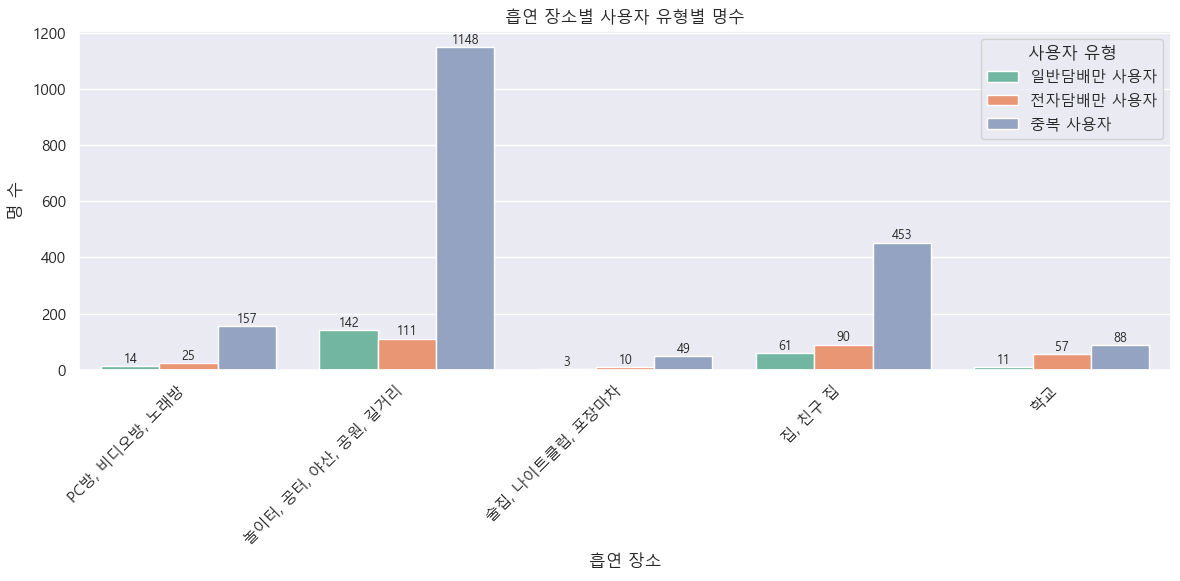

In [151]:
# 🔹 명수 기준 시각화
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=grouped,
    x="변환_흡연장소",
    y="count",
    hue="사용자유형",
    palette="Set2"
)

# 라벨 추가 (명 수)
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.5,
            f"{int(height)}",
            ha="center",
            va="bottom",
            fontsize=9
        )

plt.title("흡연 장소별 사용자 유형별 명수")
plt.ylabel("명 수")
plt.xlabel("흡연 장소")
plt.xticks(rotation=45, ha="right")
plt.legend(title="사용자 유형")
plt.tight_layout()
plt.show()

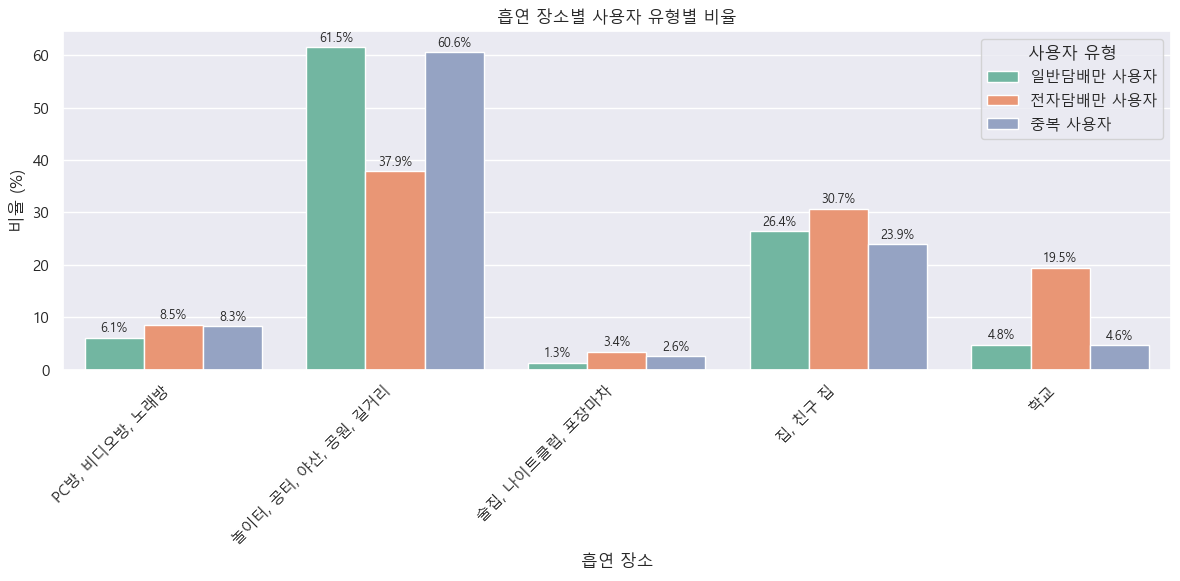

In [149]:
# 시각화
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=grouped,
    x="변환_흡연장소",
    y="percent",
    hue="사용자유형",
    palette="Set2"
)

# 라벨 추가
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.5,
            f"{height:.1f}%",
            ha="center",
            va="bottom",
            fontsize=9
        )

plt.title("흡연 장소별 사용자 유형별 비율")
plt.ylabel("비율 (%)")
plt.xlabel("흡연 장소")
plt.xticks(rotation=45, ha="right")
plt.legend(title="사용자 유형")
plt.tight_layout()
plt.show()

- 카이제곱 검정 기준으로 일반담배만 피는 사용자와 중복 사용자는 패턴이 비슷하나, 
- 전자담배만 사용자는 일반담배 / 중복과 모두 분포가 다르다고 할 수 있음.

- 전자담배는 야외, 집, 학교 순으로 어느 정도 비슷하게 흡연한다면, 일반담배나 중복의 경우 압도적으로 야외가 많고, 그 다음은 집, 유흥시설 순서로 흡연

## 담배 구매 방법

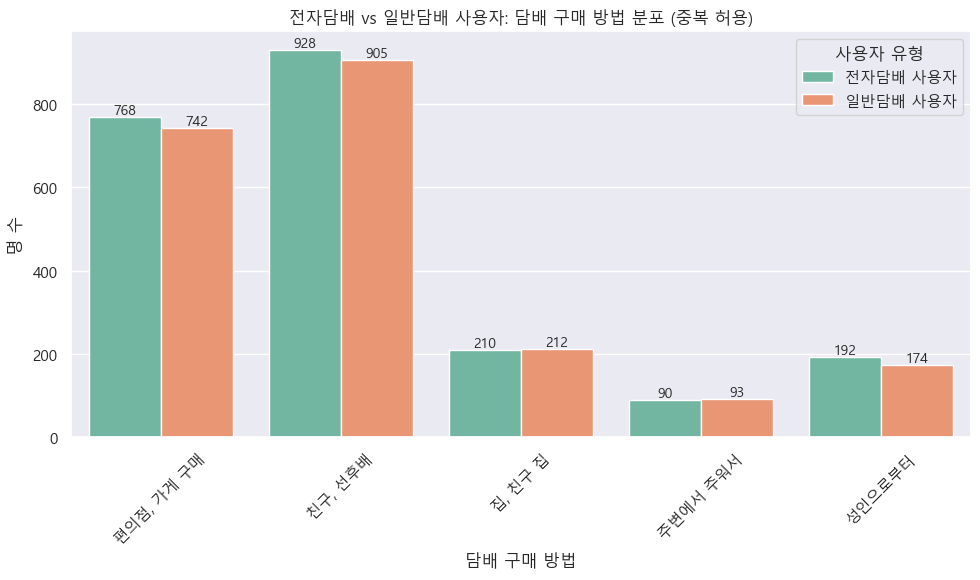

In [142]:
# 사용자 유형 컬럼 생성 (중복 허용을 위해 list 형태)
df_copy = df.copy()
df_copy["사용자유형"] = df_copy.apply(
    lambda row: [
        user for user, cond in {
            "전자담배 사용자": row["전자담배_통합경험"],
            "일반담배 사용자": row["변환_평생_흡연_경험"]
        }.items() if cond == True
    ],
    axis=1
)

# explode로 long-form 형태로 변환
df_exploded = df_copy.explode("사용자유형")

# 유효한 사용자 유형만 필터링
df_plot = df_exploded[
    df_exploded["사용자유형"].isin(["전자담배 사용자", "일반담배 사용자"]) &
    df_exploded["변환_담배_구매_방법"].notna()
]

# 시각화
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_plot,
    x="변환_담배_구매_방법",
    hue="사용자유형",
    palette="Set2"
)

# 막대 위 라벨링
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f"{int(height)}",
                    (p.get_x() + p.get_width() / 2, height),
                    ha="center", va="bottom", fontsize=10)

plt.title("전자담배 vs 일반담배 사용자: 담배 구매 방법 분포 (중복 허용)")
plt.xlabel("담배 구매 방법")
plt.ylabel("명 수")
plt.xticks(rotation=45)
plt.legend(title="사용자 유형")
plt.tight_layout()
plt.show()

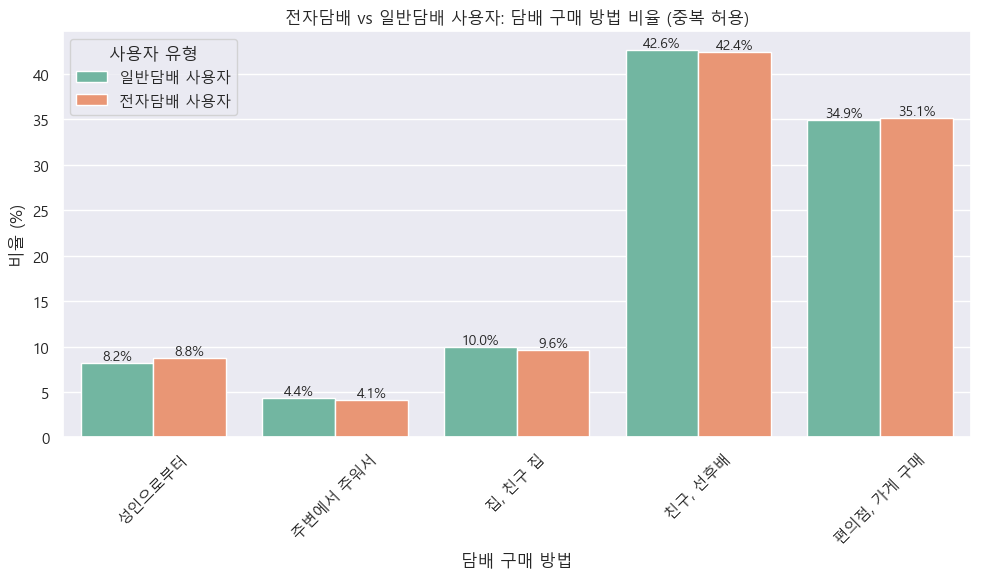

In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 사용자 유형 생성 (중복 허용)
df_copy = df.copy()
df_copy["사용자유형"] = df_copy.apply(
    lambda row: [
        user for user, cond in {
            "전자담배 사용자": row["전자담배_통합경험"],
            "일반담배 사용자": row["변환_평생_흡연_경험"]
        }.items() if cond == True
    ],
    axis=1
)

# long-form 변환
df_exploded = df_copy.explode("사용자유형")

# 유효한 데이터 필터링
df_plot = df_exploded[
    df_exploded["사용자유형"].isin(["전자담배 사용자", "일반담배 사용자"]) &
    df_exploded["변환_담배_구매_방법"].notna()
]

# ✅ 그룹별 비율 계산
grouped = (
    df_plot.groupby(["사용자유형", "변환_담배_구매_방법"])
    .size()
    .reset_index(name="count")
)

# 비율 계산
grouped["percent"] = grouped.groupby("사용자유형")["count"].transform(lambda x: x / x.sum() * 100)

# 시각화
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=grouped,
    x="변환_담배_구매_방법",
    y="percent",
    hue="사용자유형",
    palette="Set2"
)

# 막대 위에 비율 라벨 표시
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f"{height:.1f}%",  # 소수점 1자리
                    (p.get_x() + p.get_width() / 2, height),
                    ha="center", va="bottom", fontsize=10)

plt.title("전자담배 vs 일반담배 사용자: 담배 구매 방법 비율 (중복 허용)")
plt.xlabel("담배 구매 방법")
plt.ylabel("비율 (%)")
plt.xticks(rotation=45)
plt.legend(title="사용자 유형")
plt.tight_layout()
plt.show()

In [162]:
df_copy = df.copy()

# 마스크 정의
mask_e = df_copy["전자담배_통합경험"] == True
mask_c = df_copy["변환_평생_흡연_경험"] == True

# 사용자유형 분류
df_copy["사용자유형"] = None
df_copy.loc[mask_e & ~mask_c, "사용자유형"] = "전자담배만 사용자"
df_copy.loc[mask_c & ~mask_e, "사용자유형"] = "일반담배만 사용자"
df_copy.loc[mask_e & mask_c, "사용자유형"] = "중복 사용자"

# 유효한 데이터만 필터링
df_plot = df_copy[
    df_copy["사용자유형"].notna() &
    df_copy["변환_담배_구매_방법"].notna()
]

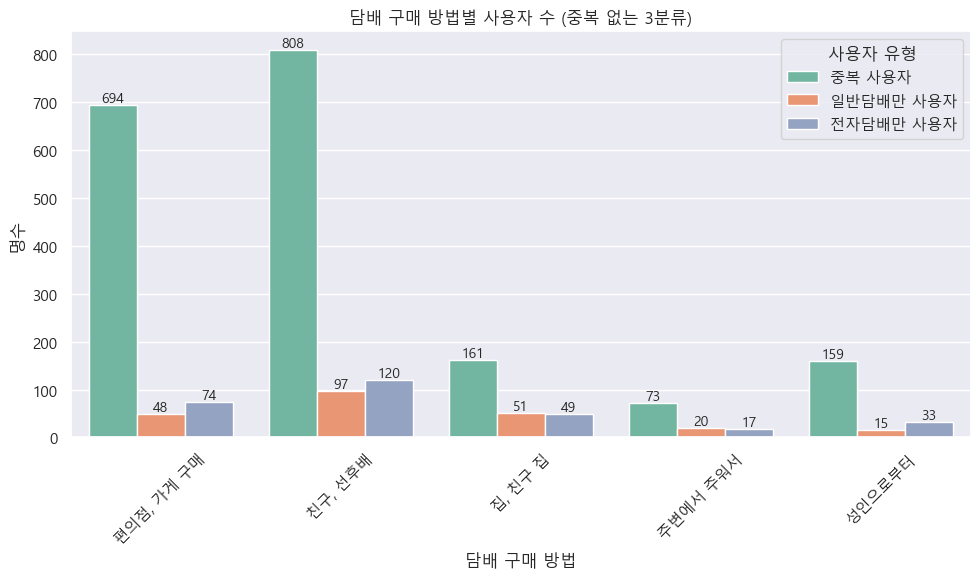

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_plot,
    x="변환_담배_구매_방법",
    hue="사용자유형",
    palette="Set2"
)

# 라벨 추가
for p in ax.patches:
    count = int(p.get_height())
    if count > 0:
        ax.annotate(f"{count}",
                    (p.get_x() + p.get_width() / 2, count),
                    ha="center", va="bottom", fontsize=10)

plt.title("담배 구매 방법별 사용자 수 (중복 없는 3분류)")
plt.xlabel("담배 구매 방법")
plt.ylabel("명수")
plt.xticks(rotation=45)
plt.legend(title="사용자 유형")
plt.tight_layout()
plt.show()

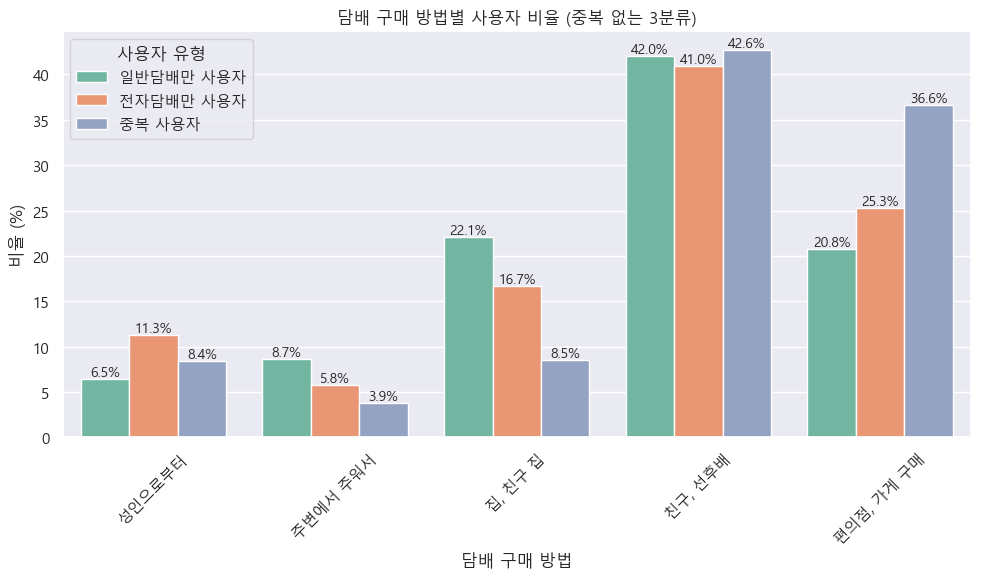

In [164]:
# 비율 계산
grouped = (
    df_plot
    .groupby(["사용자유형", "변환_담배_구매_방법"])
    .size()
    .reset_index(name="count")
)

grouped["percent"] = grouped.groupby("사용자유형")["count"].transform(lambda x: x / x.sum() * 100)

# 시각화
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=grouped,
    x="변환_담배_구매_방법",
    y="percent",
    hue="사용자유형",
    palette="Set2"
)

# 비율 라벨
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f"{height:.1f}%",
                    (p.get_x() + p.get_width() / 2, height),
                    ha="center", va="bottom", fontsize=10)

plt.title("담배 구매 방법별 사용자 비율 (중복 없는 3분류)")
plt.xlabel("담배 구매 방법")
plt.ylabel("비율 (%)")
plt.xticks(rotation=45)
plt.legend(title="사용자 유형")
plt.tight_layout()
plt.show()

- 단, 그래프 시각화를 통해서 봤을 때는 약간씩의 차이는 보임.
- 순위는 같으나, 일반담배는 전자담배보다 집, 친구 집이나 주변에서 구하는 경우의 비율이 높고,
- 전자담배는 일반담배보다 성인이나 편의점, 가게 구매에서 구하는 경우의 비율이 높음

In [169]:
from scipy.stats import chi2_contingency
from itertools import combinations
from IPython.display import display

# 사용자유형 조합
user_types = ["전자담배만 사용자", "일반담배만 사용자", "중복 사용자"]
pairs = list(combinations(user_types, 2))

for u1, u2 in combinations(user_types, 2):
    temp = df_plot[df_plot["사용자유형"].isin([u1, u2])]
    contingency = pd.crosstab(temp["사용자유형"], temp["변환_담배_구매_방법"])
    
    chi2, p, dof, expected = chi2_contingency(contingency)
    expected_df = pd.DataFrame(expected, index=contingency.index, columns=contingency.columns)

    print(f"\n🚩 사용자유형: '{u1}' vs '{u2}'")
    print(f"Chi-squared: {chi2:.4f} | p-value: {p:.4f} | dof: {dof}")
    print("Expected Frequencies:")
    display(expected_df)


🚩 사용자유형: '전자담배만 사용자' vs '일반담배만 사용자'
Chi-squared: 7.7851 | p-value: 0.0998 | dof: 4
Expected Frequencies:


변환_담배_구매_방법,성인으로부터,주변에서 주워서,"집, 친구 집","친구, 선후배","편의점, 가게 구매"
사용자유형,,,,,
일반담배만 사용자,21.160305,16.311069,44.083969,95.662214,53.782443
전자담배만 사용자,26.839695,20.688931,55.916031,121.337786,68.217557



🚩 사용자유형: '전자담배만 사용자' vs '중복 사용자'
Chi-squared: 32.1391 | p-value: 0.0000 | dof: 4
Expected Frequencies:


변환_담배_구매_방법,성인으로부터,주변에서 주워서,"집, 친구 집","친구, 선후배","편의점, 가게 구매"
사용자유형,,,,,
전자담배만 사용자,25.711152,12.052102,28.121572,124.270567,102.844607
중복 사용자,166.288848,77.947898,181.878428,803.729433,665.155393



🚩 사용자유형: '일반담배만 사용자' vs '중복 사용자'
Chi-squared: 64.6947 | p-value: 0.0000 | dof: 4
Expected Frequencies:


변환_담배_구매_방법,성인으로부터,주변에서 주워서,"집, 친구 집","친구, 선후배","편의점, 가게 구매"
사용자유형,,,,,
일반담배만 사용자,18.905927,10.104892,23.034807,98.332549,80.621825
중복 사용자,155.094073,82.895108,188.965193,806.667451,661.378175


- 마찬가지로 일반담배와 전자담배에 중복이 있어, 쌍별로 각각 카이제곱검정 진행했음,
- 나머지는 분포의 차이를 보이나, 각각 전자담배와 일반담배만 사용하는 경우는 분포가 비슷함